<h2>Комп'ютерний практикум з обробки біомедичних даних</h2>
<h3>за темою: парний t-критерій Стьюдента для незалежних вибірок </h3>
<h3>студентки групи БС-81</h3>
<h3>Кисельової Ірини</h3>

`Посилання на репозиторій github: https://github.com/Irines/MedImages/tree/master/Lab7 `

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. 

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import normaltest
%matplotlib inline

In [4]:
df = pd.DataFrame({
    'var1_normal': np.random.normal(loc=10, scale=2, size=30),
    'var2_normal': np.random.normal(loc=1, scale=2, size=30)
})
df

,var1_normal,var2_normal
0,10.949458,1.291718
1,10.060812,1.243963
2,9.035025,3.673518
3,11.186033,-3.110589
4,10.785646,0.152638
5,10.714384,-1.046550
6,8.543736,2.214284
7,10.548695,0.647509
8,11.155593,0.364409
9,6.778292,0.314843


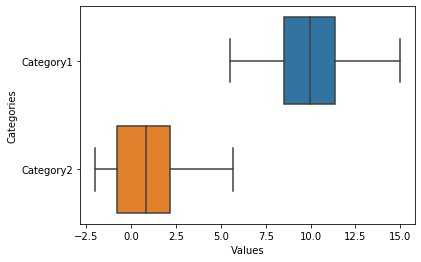

In [12]:
import seaborn as sns
ax = sns.boxplot(data=df, orient='h');
ax.set(xlabel='Values', ylabel='Categories');
ax.set_yticklabels(['Category1', 'Category2']);

In [8]:
def is_significant(f, val):
    if(f > val):
        return "not significant"
    return "significant"

def coefficients(lev, df):
    if(df > 20):
        return lev.iloc[21,12]
    elif(df > 15):
        return lev.iloc[df,11]
    elif(df > 10):
        return lev.iloc[df,10]
    return lev.iloc[df,df]

def levene(data):
    df = len(data)-1
    levene = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx", encoding = 'utf-8')
    val = coefficients(levene, df)
    value1 = data.iloc[:, 0].var();
    value2 = data.iloc[:, 1].var();
    
    if(value1 > value2):
        f = value1**2/value2**2 
    f = value2**2/value1**2
    equality = is_significant(f, val)
    return f, df, equality


levene(df)

(1.0842646333655337, 29, 'significant')

In [16]:
import statistics
def findT(data1, data2, df, d_mean, equality):
    if equality == 'significant':
        return d_mean / np.sqrt(statistics.stdev(data1)**2 / data1.count() + statistics.stdev(data2)**2 / data2.count())
    numerator = (data1.count() - 1)*statistics.stdev(data1)**2+(data2.count() - 1)*statistics.stdev(data2)**2
    denominator = df * (data1.count() + data2.count()/data1.count() * data2.count())
    return np.sqrt(numerator/denominator)

def findClosest(coefficients, df):
    k = lambda x: abs(int(x)-df)
    return min(coefficients.index[:-1], key = k)

def findDF(coefficients, df):
    if df in coefficients.index:
        return coefficients.loc[df][0]
    return findClosest(coefficients, df)
    
def t_test(equality, data):
    data1 = data.iloc[:, 0]
    data2 = data.iloc[:, 1]
    
    df = len(data1) +  len(data2) - 2
    d_mean = abs( data1.mean() - data2.mean())
    t = findT(data1, data2,  df, d_mean, equality)
    
    table = pd.read_excel('Таблиця критичних значень для критерію Стьюдента.xlsx',index_col=0, index=False)
    cmp_val = findDF(table, df)
    
    if t > cmp_val:
        is_significant = "not significant"
    else :
        is_significant = "significant" 
       
    return t, df, is_significant
    
t_test(equality, df)

(17.724509183938412, 58, 'not significant')

<h2>Висновок</h2>
Оскільки всі вимоги до досліджуваних даних були виконані, то за результатом тесту Лівеня можна прийняти гіпотезу про однорідність дисперсій, приймаємо нульову гіпотезу.
За результатом тесту т-Стьюдента бачимо, що розраховане значення більше критичного - нульову гіпотезу відхиляюємо та робимо висновок про статистичну відмінність середніх двох незалежних груп